1. Para-procesimi i te dhenave përgatitjen e të dhënave për analizë

In [182]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from IPython.display import display

ModuleNotFoundError: No module named 'sklearn'

Mbledhja e të dhënave, definimi i tipeve të dhënave, kualiteti i të
dhënave.

In [3]:
#Ngarkimi i te dhenave
file_path ='dataset.csv'
data=pd.read_csv(file_path)
data

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
0,56026,19874,Moški,NE,0 oseb,Diplomiral,NE,1949.666667,1.0,33xx,Slovenija,5 let,STANOVANJSKI KREDIT,NaN,90.0,1.42%,NaN,prenova,Y
1,53884,34258,Moški,DA,1 oseba,Diplomiral,NE,1527.666667,1.0,64xx,Slovenija,10+ let,NAJEM,44800.0,90.0,3.90%,NaN,drugo,N
2,48350,66552,Moški,DA,0 oseb,Brez diplome,NE,861.000000,1.0,30xx,si,3 leta,NAJEM,42000.0,90.0,2.80%,NaN,NaN,Y
3,30455,54844,Moški,DA,2 osebi,Diplomiral,NE,1066.666667,1.0,84xx,SI,1 leto,NAJEM,24500.0,90.0,3.26%,NaN,NaN,Y
4,935,18820,Moški,DA,2 osebi,Diplomiral,NaN,833.333333,1.0,60xx,SI,10+ let,STANOVANJSKI KREDIT,38150.0,90.0,3.26%,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38762,19296,7212,NaN,DA,1 oseba,Diplomiral,NE,873.333333,1.0,14xx,SI,NaN,NAJEM,57750.0,90.0,2.89%,NaN,kartica,Y
38763,20271,32616,Moški,NE,0 oseb,Diplomiral,NE,3107.666667,1.0,63xx,Slo,3 leta,STANOVANJSKI KREDIT,17500.0,90.0,1.52%,Posojilojemalec je dodal na 02-06-14 > Samo o...,NaN,Y
38764,27733,46393,Ženska,DA,NaN,Diplomiral,DA,800.000000,0.0,42xx,SI,2 leti,LASTNO,58800.0,90.0,2.50%,NaN,NaN,N
38765,42707,20062,Moški,DA,3+ osebe,Diplomiral,NE,1365.000000,NaN,84xx,SI,3 leta,STANOVANJSKI KREDIT,43050.0,120.0,1.78%,NaN,NaN,Y


In [4]:
# Informacion rreth dataframe-it 
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38767 entries, 0 to 38766
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LoanID                  38767 non-null  int64  
 1   ApplicantID             38767 non-null  int64  
 2   ApplicantGender         37902 non-null  object 
 3   ApplicantMarried        38573 non-null  object 
 4   ApplicantDependents     37775 non-null  object 
 5   ApplicantEducation      38767 non-null  object 
 6   ApplicantSelfEmployed   36702 non-null  object 
 7   ApplicantIncome         38767 non-null  float64
 8   ApplicantCreditHistory  35687 non-null  float64
 9   ApplicantZIP            38767 non-null  object 
 10  ApplicantState          38767 non-null  object 
 11  ApplicantEmplLength     36924 non-null  object 
 12  ApplicantHomeOwn        38767 non-null  object 
 13  LoanAmount              37370 non-null  float64
 14  LoanTerm                37863 non-null

In [5]:
#numri i rreshtave dhe kolonave ne dataframe
data.shape

(38767, 19)

In [6]:
#dtypes
data.dtypes

LoanID                      int64
ApplicantID                 int64
ApplicantGender            object
ApplicantMarried           object
ApplicantDependents        object
ApplicantEducation         object
ApplicantSelfEmployed      object
ApplicantIncome           float64
ApplicantCreditHistory    float64
ApplicantZIP               object
ApplicantState             object
ApplicantEmplLength        object
ApplicantHomeOwn           object
LoanAmount                float64
LoanTerm                  float64
LoanIntRate                object
LoanDesc                   object
LoanPurpose                object
LoanApproved               object
dtype: object

In [7]:
#shfaq statistikat per çdo kolone ne DataFrame
print(data.describe().T)

                          count          mean           std     min      25%  \
LoanID                  38767.0  34552.451441  19888.051126     1.0  17433.5   
ApplicantID             38767.0  34544.994918  19990.383285     1.0  17141.5   
ApplicantIncome         38767.0   1801.602781   2013.534166    50.0    963.0   
ApplicantCreditHistory  35687.0      0.842099      0.364653     0.0      1.0   
LoanAmount              37370.0  51087.712069  29882.568304  3150.0  35000.0   
LoanTerm                37863.0     85.473576     16.198891     3.0     90.0   

                            50%           75%       max  
LoanID                  34460.0  51691.000000   69133.0  
ApplicantID             34480.0  51847.500000   69134.0  
ApplicantIncome          1271.0   1933.333333   27000.0  
ApplicantCreditHistory      1.0      1.000000       1.0  
LoanAmount              44800.0  58450.000000  245000.0  
LoanTerm                   90.0     90.000000     120.0  


In [8]:
print(data.describe(include="O").T)

                       count unique  \
ApplicantGender        37902      2   
ApplicantMarried       38573      2   
ApplicantDependents    37775      4   
ApplicantEducation     38767      2   
ApplicantSelfEmployed  36702      2   
ApplicantZIP           38767     44   
ApplicantState         38767      5   
ApplicantEmplLength    36924     11   
ApplicantHomeOwn       38767      3   
LoanIntRate            38767     65   
LoanDesc                1521   1119   
LoanPurpose            14845      9   
LoanApproved           38767      2   

                                                                     top  \
ApplicantGender                                                    Moški   
ApplicantMarried                                                      DA   
ApplicantDependents                                               0 oseb   
ApplicantEducation                                            Diplomiral   
ApplicantSelfEmployed                                                 NE 

In [9]:
# llogarit perqindjen e rreshtave te dyfishte ne DataFrame

duplicated=data.duplicated().sum()
print((duplicated/len(data))*100 , '%')

0.0 %


In [10]:
# Funksioni missing_values_table llogarit numrin dhe perqindjen e vlerave Null

def missing_values_table(data):
  mis_val = data.isnull().sum()
  mis_val_percent = 100*data.isnull().sum() / len(data)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values' , 1:'% of Total Values'})
  return mis_val_table_ren_columns.round(1)

In [11]:
missing_values_table(data)

,Missing Values,% of Total Values
LoanID,0,0.0
ApplicantID,0,0.0
ApplicantGender,865,2.2
ApplicantMarried,194,0.5
ApplicantDependents,992,2.6
ApplicantEducation,0,0.0
ApplicantSelfEmployed,2065,5.3
ApplicantIncome,0,0.0
ApplicantCreditHistory,3080,7.9
ApplicantZIP,0,0.0


In [12]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data_sorted = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=True)

print("\nMissing values in the dataset:\n", missing_data_sorted)


Missing values in the dataset:
                         Missing Values  Percentage
ApplicantMarried                   194    0.500426
ApplicantGender                    865    2.231279
LoanTerm                           904    2.331880
ApplicantDependents                992    2.558877
LoanAmount                        1397    3.603580
ApplicantEmplLength               1843    4.754043
ApplicantSelfEmployed             2065    5.326695
ApplicantCreditHistory            3080    7.944902
LoanPurpose                      23922   61.707122
LoanDesc                         37246   96.076560


In [13]:
data['ApplicantDependents'].value_counts().reset_index().rename(columns={'index' : 'ApplicantDependents' , 'ApplicantDependents' : 'counts'})



,ApplicantDependents,counts
0,0 oseb,21803
1,1 oseba,6397
2,2 osebi,6329
3,3+ osebe,3246


In [14]:
data['ApplicantEmplLength'].value_counts().reset_index().rename(columns={'index' : 'ApplicantEmplLength' , 'ApplicantEmplLength' : 'counts'})

,ApplicantEmplLength,counts
0,10+ let,12695
1,2 leti,3451
2,3 leta,3093
3,< 1 leto,2988
4,1 leto,2526
5,7 let,2244
6,5 let,2203
7,4 leta,2140
8,6 let,2059
9,8 let,1898


In [15]:
data['ApplicantGender'].value_counts().reset_index().rename(columns={'index' : 'ApplicantGender' , 'ApplicantGender' : 'counts'})

,ApplicantGender,counts
0,Moški,30882
1,Ženska,7020


In [16]:
data['LoanAmount'].value_counts().reset_index().rename(columns={'index' : 'LoanAmount' , 'LoanAmount' : 'counts'})

,LoanAmount,counts
0,42000.0,1241
1,38500.0,1127
2,35000.0,920
3,65450.0,773
4,56000.0,757
...,...,...
198,12250.0,52
199,122150.0,51
200,93450.0,50
201,122500.0,49


In [17]:
data['ApplicantHomeOwn'].value_counts().reset_index().rename(columns={'index' : 'ApplicantHomeOwn' , 'ApplicantHomeOwn' : 'counts'})

,ApplicantHomeOwn,counts
0,STANOVANJSKI KREDIT,19667
1,NAJEM,15341
2,LASTNO,3759


In [18]:
data['ApplicantEducation'].value_counts().reset_index().rename(columns={'index' : 'ApplicantEducation' , 'ApplicantEducation' : 'counts'})

,ApplicantEducation,counts
0,Diplomiral,30132
1,Brez diplome,8635


In [19]:
data['ApplicantState'].value_counts().reset_index().rename(columns={'index' : 'ApplicantState' , 'ApplicantState' : 'counts'})

,ApplicantState,counts
0,SI,19357
1,Slovenija,9692
2,si,4750
3,Slo,2969
4,slo,1999


In [20]:
data['ApplicantZIP'].value_counts().reset_index().rename(columns={'index' : 'ApplicantZIP' , 'ApplicantZIP' : 'counts'})

,ApplicantZIP,counts
0,33xx,3259
1,11xx,3059
2,60xx,2818
3,30xx,2312
4,10xx,2278
5,32xx,1679
6,20xx,1601
7,80xx,1591
8,02xx,1416
9,21xx,1196


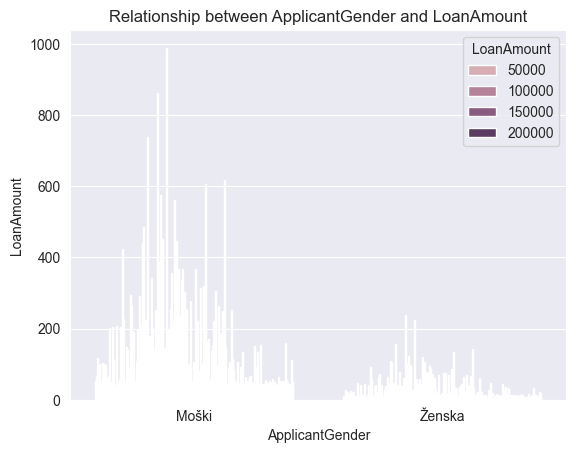

In [21]:
sns.set_palette(['#9932CC','#EEE685'])
sns.countplot(x='ApplicantGender', hue='LoanAmount', data=data)
plt.xlabel('ApplicantGender')
plt.ylabel('LoanAmount')
plt.title('Relationship between ApplicantGender and LoanAmount')

plt.show()

Text(0.5, 1.0, 'Relationship between Years in Applicant Gender   and Loan Approved')

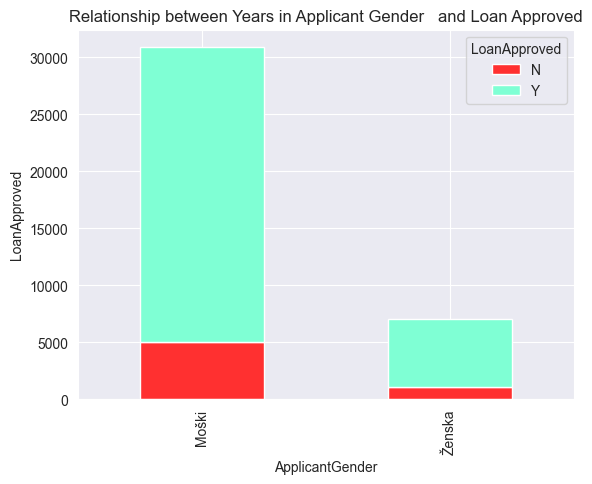

In [22]:
ct = pd.crosstab(data['ApplicantGender'], data['LoanApproved'])
ct.plot(kind='bar', stacked=True , color=['#FF3030','#7FFFD4'])
plt.xlabel('ApplicantGender')
plt.ylabel('LoanApproved')
plt.title('Relationship between Years in Applicant Gender   and Loan Approved')

Text(0.5, 1.0, 'Relationship between Years in Applicant House  Own and Loan Approved')

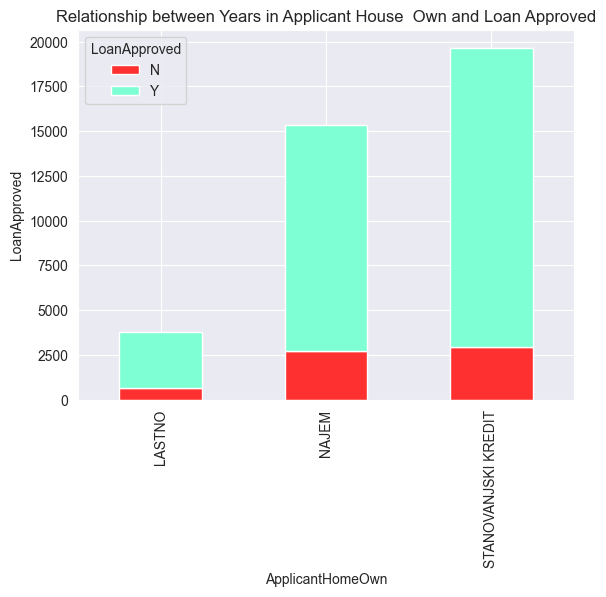

In [23]:
ct = pd.crosstab(data['ApplicantHomeOwn'], data['LoanApproved'])
ct.plot(kind='bar', stacked=True , color=['#FF3030','#7FFFD4'])
plt.xlabel('ApplicantHomeOwn')
plt.ylabel('LoanApproved')
plt.title('Relationship between Years in Applicant House  Own and Loan Approved')

In [24]:
data.head()

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
0,56026,19874,Moški,NE,0 oseb,Diplomiral,NE,1949.666667,1.0,33xx,Slovenija,5 let,STANOVANJSKI KREDIT,NaN,90.0,1.42%,NaN,prenova,Y
1,53884,34258,Moški,DA,1 oseba,Diplomiral,NE,1527.666667,1.0,64xx,Slovenija,10+ let,NAJEM,44800.0,90.0,3.90%,NaN,drugo,N
2,48350,66552,Moški,DA,0 oseb,Brez diplome,NE,861.000000,1.0,30xx,si,3 leta,NAJEM,42000.0,90.0,2.80%,NaN,NaN,Y
3,30455,54844,Moški,DA,2 osebi,Diplomiral,NE,1066.666667,1.0,84xx,SI,1 leto,NAJEM,24500.0,90.0,3.26%,NaN,NaN,Y
4,935,18820,Moški,DA,2 osebi,Diplomiral,NaN,833.333333,1.0,60xx,SI,10+ let,STANOVANJSKI KREDIT,38150.0,90.0,3.26%,NaN,NaN,Y


In [25]:
data.tail(25)

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
38742,9643,48615,Moški,NE,2 osebi,Diplomiral,NE,694.333333,1.0,34xx,si,10+ let,NAJEM,47250.0,90.0,1.78%,Posojilojemalec je dodal 02-06-14 > Zmanjanj...,NaN,Y
38743,18904,41403,Ženska,DA,0 oseb,Brez diplome,NE,586.333333,NaN,40xx,SI,3 leta,NAJEM,64750.0,90.0,4.10%,NaN,NaN,Y
38744,20421,7408,Moški,NE,0 oseb,Diplomiral,NE,1286.333333,1.0,10xx,SI,5 let,NAJEM,84000.0,45.0,2.89%,NaN,NaN,Y
38745,67635,31925,Moški,DA,2 osebi,Diplomiral,NE,1139.333333,1.0,11xx,SI,10+ let,NAJEM,38150.0,90.0,2.80%,NaN,NaN,Y
38746,57288,439,Moški,DA,2 osebi,Diplomiral,NE,1170.000000,1.0,64xx,SI,1 leto,STANOVANJSKI KREDIT,42000.0,90.0,2.40%,NaN,NaN,Y
38747,45892,4807,Moški,NE,1 oseba,Diplomiral,NE,1585.000000,1.0,34xx,Slovenija,7 let,STANOVANJSKI KREDIT,24500.0,90.0,3.25%,NaN,NaN,Y
38748,43858,43206,Moški,NE,3+ osebe,Diplomiral,NE,5564.000000,1.0,10xx,SI,10+ let,LASTNO,100100.0,90.0,3.51%,NaN,NaN,Y
38749,58816,17464,Moški,NE,0 oseb,Brez diplome,NE,609.333333,1.0,32xx,Slovenija,5 let,STANOVANJSKI KREDIT,49700.0,90.0,3.25%,Posojilojemalec je dodal na 02-06-14 > Za pla...,NaN,Y
38750,3971,46270,Moški,DA,1 oseba,Diplomiral,NE,1915.333333,1.0,02xx,SI,10+ let,STANOVANJSKI KREDIT,10500.0,45.0,3.51%,NaN,NaN,Y
38751,63763,65046,Moški,NE,0 oseb,Diplomiral,NE,3379.666667,1.0,13xx,slo,9 let,NAJEM,30800.0,90.0,2.89%,NaN,kartica,Y


Aggregating Data

In [26]:
income_aggregation = data.groupby('LoanApproved')['ApplicantIncome'].agg(['mean', 'median', 'count'])

display(income_aggregation)

,mean,median,count
LoanApproved,,,
N,1774.368390,1270.666667,6285
Y,1806.872411,1271.000000,32482


In [27]:
loan_amunt_aggregation = data.groupby('ApplicantDependents')['LoanAmount'].agg(['sum','mean','count'])

display(loan_amunt_aggregation)

,sum,mean,count
ApplicantDependents,,,
0 oseb,1.070371e+09,50977.332476,20997
1 oseba,3.173835e+08,51531.660984,6159
2 osebi,3.125220e+08,51065.686275,6120
3+ osebe,1.606182e+08,51184.878904,3138


In [28]:
loan_city_aggregation = data.groupby('ApplicantZIP')['LoanAmount'].agg(['min', 'max'])
display(loan_city_aggregation)

,min,max
ApplicantZIP,,
00xx,NaN,NaN
01xx,3150.0,245000.0
02xx,3150.0,245000.0
03xx,5950.0,245000.0
04xx,74900.0,74900.0
10xx,3150.0,245000.0
11xx,3150.0,245000.0
12xx,3150.0,245000.0
13xx,8750.0,245000.0


Sampling

In [29]:
data_sample = data.sample(frac=0.3, random_state=42)

In [30]:
data_sample.shape

(11630, 19)

Data cleaning and transformation

In [31]:
#convert Applicant Dependents to numeric values 
data_sample['ApplicantDependents'] = data_sample['ApplicantDependents'].replace({
    '0 oseb': 0, '1 oseba': 1, '2 osebi': 2, '3+ osebe': 3
}).astype('float')

In [32]:
data_sample['ApplicantZIP'] = data_sample['ApplicantZIP'].str.replace('xx', '').astype(int)

print(data_sample[['ApplicantZIP']].head())

       ApplicantZIP
22726            10
429              11
25021            14
31218            30
12257            44


In [33]:
data_sample

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
22726,45554,5525,Moški,DA,0.0,Diplomiral,DA,1033.333333,0.0,10,SI,6 let,NAJEM,17500.0,45.0,3.12%,NaN,NaN,N
429,16322,2432,Ženska,NE,3.0,Brez diplome,NE,2011.000000,1.0,11,si,8 let,NAJEM,19600.0,90.0,1.30%,NaN,NaN,Y
25021,41728,34624,Moški,NE,2.0,Brez diplome,NE,6055.000000,1.0,14,Slovenija,7 let,STANOVANJSKI KREDIT,35000.0,90.0,1.21%,NaN,NaN,Y
31218,20705,26652,Moški,NE,0.0,Diplomiral,DA,716.333333,NaN,30,SI,10+ let,STANOVANJSKI KREDIT,39200.0,90.0,1.52%,NaN,kartica,Y
12257,55115,19275,Moški,NE,2.0,Diplomiral,NE,826.333333,1.0,44,si,9 let,STANOVANJSKI KREDIT,50050.0,90.0,3.80%,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,46818,8528,NaN,DA,1.0,Diplomiral,NE,2000.000000,1.0,32,SI,4 leta,STANOVANJSKI KREDIT,39550.0,45.0,4.69%,NaN,NaN,Y
29399,58504,17768,Moški,NE,0.0,Brez diplome,DA,2555.666667,1.0,44,SI,1 leto,STANOVANJSKI KREDIT,52850.0,21.0,2.83%,NaN,NaN,Y
6198,39378,1500,Moški,NE,0.0,Diplomiral,NE,2274.000000,1.0,12,Slovenija,9 let,NAJEM,60200.0,90.0,2.50%,NaN,drugo,Y
4999,5117,51388,Ženska,DA,2.0,Diplomiral,NaN,1856.000000,1.0,44,Slo,2 leti,NAJEM,44100.0,90.0,2.50%,NaN,NaN,Y


In [34]:
# standardize 'ApplicantEmplLength' by capturing numbers and converting "< 1 leto" as 0.5
def clean_employment_length(value):
    if isinstance(value, str):
        match = re.search(r"(\d+)", value)
        if match:
            return float(match.group(1))
        elif "< 1" in value:
            return 0.5
    return value


In [35]:
data_sample['ApplicantEmplLength'] = data_sample['ApplicantEmplLength'].apply(clean_employment_length).astype('float')
data_sample

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
22726,45554,5525,Moški,DA,0.0,Diplomiral,DA,1033.333333,0.0,10,SI,6.0,NAJEM,17500.0,45.0,3.12%,NaN,NaN,N
429,16322,2432,Ženska,NE,3.0,Brez diplome,NE,2011.000000,1.0,11,si,8.0,NAJEM,19600.0,90.0,1.30%,NaN,NaN,Y
25021,41728,34624,Moški,NE,2.0,Brez diplome,NE,6055.000000,1.0,14,Slovenija,7.0,STANOVANJSKI KREDIT,35000.0,90.0,1.21%,NaN,NaN,Y
31218,20705,26652,Moški,NE,0.0,Diplomiral,DA,716.333333,NaN,30,SI,10.0,STANOVANJSKI KREDIT,39200.0,90.0,1.52%,NaN,kartica,Y
12257,55115,19275,Moški,NE,2.0,Diplomiral,NE,826.333333,1.0,44,si,9.0,STANOVANJSKI KREDIT,50050.0,90.0,3.80%,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,46818,8528,NaN,DA,1.0,Diplomiral,NE,2000.000000,1.0,32,SI,4.0,STANOVANJSKI KREDIT,39550.0,45.0,4.69%,NaN,NaN,Y
29399,58504,17768,Moški,NE,0.0,Brez diplome,DA,2555.666667,1.0,44,SI,1.0,STANOVANJSKI KREDIT,52850.0,21.0,2.83%,NaN,NaN,Y
6198,39378,1500,Moški,NE,0.0,Diplomiral,NE,2274.000000,1.0,12,Slovenija,9.0,NAJEM,60200.0,90.0,2.50%,NaN,drugo,Y
4999,5117,51388,Ženska,DA,2.0,Diplomiral,NaN,1856.000000,1.0,44,Slo,2.0,NAJEM,44100.0,90.0,2.50%,NaN,NaN,Y


In [36]:
#covert 'LoanIntRate' to float by removing % symbol 
data_sample['LoanIntRate']= data_sample['LoanIntRate'].str.replace('%','').astype('float')
data_sample

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
22726,45554,5525,Moški,DA,0.0,Diplomiral,DA,1033.333333,0.0,10,SI,6.0,NAJEM,17500.0,45.0,3.12,NaN,NaN,N
429,16322,2432,Ženska,NE,3.0,Brez diplome,NE,2011.000000,1.0,11,si,8.0,NAJEM,19600.0,90.0,1.30,NaN,NaN,Y
25021,41728,34624,Moški,NE,2.0,Brez diplome,NE,6055.000000,1.0,14,Slovenija,7.0,STANOVANJSKI KREDIT,35000.0,90.0,1.21,NaN,NaN,Y
31218,20705,26652,Moški,NE,0.0,Diplomiral,DA,716.333333,NaN,30,SI,10.0,STANOVANJSKI KREDIT,39200.0,90.0,1.52,NaN,kartica,Y
12257,55115,19275,Moški,NE,2.0,Diplomiral,NE,826.333333,1.0,44,si,9.0,STANOVANJSKI KREDIT,50050.0,90.0,3.80,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,46818,8528,NaN,DA,1.0,Diplomiral,NE,2000.000000,1.0,32,SI,4.0,STANOVANJSKI KREDIT,39550.0,45.0,4.69,NaN,NaN,Y
29399,58504,17768,Moški,NE,0.0,Brez diplome,DA,2555.666667,1.0,44,SI,1.0,STANOVANJSKI KREDIT,52850.0,21.0,2.83,NaN,NaN,Y
6198,39378,1500,Moški,NE,0.0,Diplomiral,NE,2274.000000,1.0,12,Slovenija,9.0,NAJEM,60200.0,90.0,2.50,NaN,drugo,Y
4999,5117,51388,Ženska,DA,2.0,Diplomiral,NaN,1856.000000,1.0,44,Slo,2.0,NAJEM,44100.0,90.0,2.50,NaN,NaN,Y


In [37]:
#fill missing categorical values with mode
for column in ['ApplicantGender', 'ApplicantMarried', 'ApplicantSelfEmployed', 'ApplicantCreditHistory']:
    data_sample[column].fillna(data_sample[column].mode()[0], inplace=True)


In [38]:
#fill numeric columns with median values 
for column in ['LoanAmount', 'LoanTerm','ApplicantDependents', 'ApplicantEmplLength']: 
    data_sample[column].fillna(data_sample[column].median(), inplace=True)

In [39]:
data_sample['LoanPurpose'].fillna('Unknown', inplace=True)

In [40]:
data_sample.drop(columns=['LoanDesc'], inplace=True)

In [41]:
print("Remaining Missing Values:", data_sample.isnull().sum())
print("Data Types:", data_sample.dtypes)

Remaining Missing Values: LoanID                    0
ApplicantID               0
ApplicantGender           0
ApplicantMarried          0
ApplicantDependents       0
ApplicantEducation        0
ApplicantSelfEmployed     0
ApplicantIncome           0
ApplicantCreditHistory    0
ApplicantZIP              0
ApplicantState            0
ApplicantEmplLength       0
ApplicantHomeOwn          0
LoanAmount                0
LoanTerm                  0
LoanIntRate               0
LoanPurpose               0
LoanApproved              0
dtype: int64
Data Types: LoanID                      int64
ApplicantID                 int64
ApplicantGender            object
ApplicantMarried           object
ApplicantDependents       float64
ApplicantEducation         object
ApplicantSelfEmployed      object
ApplicantIncome           float64
ApplicantCreditHistory    float64
ApplicantZIP                int32
ApplicantState             object
ApplicantEmplLength       float64
ApplicantHomeOwn           object
Loa

In [42]:
# Binning 'ApplicantIncome' into categories (low, medium, high income)
income_bins = [0, 2500, 5000, 10000, data_sample['ApplicantIncome'].max()]
income_labels = ['Low', 'Medium', 'High', 'Very High']
data_sample['IncomeLevel'] = pd.cut(data_sample['ApplicantIncome'], bins=income_bins, labels=income_labels)

In [43]:
# Binarization: Convert LoanApproved to 0 and 1
data_sample['LoanApproved'] = data_sample['LoanApproved'].replace({'Y': 1, 'N': 0})

In [44]:
# Discretizing 'LoanTerm' into short, medium, long-term categories
term_bins = [0, 60, 90, 120]  # Bin edges for Loan Term
term_labels = ['Short', 'Medium', 'Long']
data_sample['LoanTermCategory'] = pd.cut(data_sample['LoanTerm'], bins=term_bins, labels=term_labels)

In [45]:
# Transform categorical data into binary format using one-hot encoding
df =pd.get_dummies(data_sample, columns=['ApplicantGender', 'ApplicantMarried', 
                                     'ApplicantEducation', 'ApplicantSelfEmployed', 'ApplicantHomeOwn'
                                     ], drop_first=True)

In [46]:
df

,LoanID,ApplicantID,ApplicantDependents,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,LoanAmount,LoanTerm,...,LoanPurpose,LoanApproved,IncomeLevel,LoanTermCategory,ApplicantGender_Ženska,ApplicantMarried_NE,ApplicantEducation_Diplomiral,ApplicantSelfEmployed_NE,ApplicantHomeOwn_NAJEM,ApplicantHomeOwn_STANOVANJSKI KREDIT
22726,45554,5525,0.0,1033.333333,0.0,10,SI,6.0,17500.0,45.0,...,Unknown,0,Low,Short,0,0,1,0,1,0
429,16322,2432,3.0,2011.000000,1.0,11,si,8.0,19600.0,90.0,...,Unknown,1,Low,Medium,1,1,0,1,1,0
25021,41728,34624,2.0,6055.000000,1.0,14,Slovenija,7.0,35000.0,90.0,...,Unknown,1,High,Medium,0,1,0,1,0,1
31218,20705,26652,0.0,716.333333,1.0,30,SI,10.0,39200.0,90.0,...,kartica,1,Low,Medium,0,1,1,0,0,1
12257,55115,19275,2.0,826.333333,1.0,44,si,9.0,50050.0,90.0,...,Unknown,1,Low,Medium,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3562,46818,8528,1.0,2000.000000,1.0,32,SI,4.0,39550.0,45.0,...,Unknown,1,Low,Short,0,0,1,1,0,1
29399,58504,17768,0.0,2555.666667,1.0,44,SI,1.0,52850.0,21.0,...,Unknown,1,Medium,Short,0,1,0,0,0,1
6198,39378,1500,0.0,2274.000000,1.0,12,Slovenija,9.0,60200.0,90.0,...,drugo,1,Low,Medium,0,1,1,1,1,0
4999,5117,51388,2.0,1856.000000,1.0,44,Slo,2.0,44100.0,90.0,...,Unknown,1,Low,Medium,1,0,1,1,1,0


In [47]:
print(df['ApplicantState'].unique())
#since the applicant state column has a this ['SI' 'si' 'Slovenija' 'Slo' 'slo'] dropping this column is a reasonable choice to simplify the dataset without losing any critical information

df.drop(columns=['ApplicantState'], inplace=True)

['SI' 'si' 'Slovenija' 'Slo' 'slo']


In [48]:
# Final Validation
remaining_missing_values = data_sample.isnull().sum()
data_types = data_sample.dtypes

print("Remaining Missing Values:\n", remaining_missing_values[remaining_missing_values > 0])
print("\nData Types:\n", data_types)

df.head()

Remaining Missing Values:
 Series([], dtype: int64)

Data Types:
 LoanID                       int64
ApplicantID                  int64
ApplicantGender             object
ApplicantMarried            object
ApplicantDependents        float64
ApplicantEducation          object
ApplicantSelfEmployed       object
ApplicantIncome            float64
ApplicantCreditHistory     float64
ApplicantZIP                 int32
ApplicantState              object
ApplicantEmplLength        float64
ApplicantHomeOwn            object
LoanAmount                 float64
LoanTerm                   float64
LoanIntRate                float64
LoanPurpose                 object
LoanApproved                 int64
IncomeLevel               category
LoanTermCategory          category
dtype: object


,LoanID,ApplicantID,ApplicantDependents,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantEmplLength,LoanAmount,LoanTerm,LoanIntRate,LoanPurpose,LoanApproved,IncomeLevel,LoanTermCategory,ApplicantGender_Ženska,ApplicantMarried_NE,ApplicantEducation_Diplomiral,ApplicantSelfEmployed_NE,ApplicantHomeOwn_NAJEM,ApplicantHomeOwn_STANOVANJSKI KREDIT
22726,45554,5525,0.0,1033.333333,0.0,10,6.0,17500.0,45.0,3.12,Unknown,0,Low,Short,0,0,1,0,1,0
429,16322,2432,3.0,2011.000000,1.0,11,8.0,19600.0,90.0,1.30,Unknown,1,Low,Medium,1,1,0,1,1,0
25021,41728,34624,2.0,6055.000000,1.0,14,7.0,35000.0,90.0,1.21,Unknown,1,High,Medium,0,1,0,1,0,1
31218,20705,26652,0.0,716.333333,1.0,30,10.0,39200.0,90.0,1.52,kartica,1,Low,Medium,0,1,1,0,0,1
12257,55115,19275,2.0,826.333333,1.0,44,9.0,50050.0,90.0,3.80,Unknown,1,Low,Medium,0,1,1,1,0,1


In [49]:
df.drop(labels=['LoanID','ApplicantID'], axis=1, inplace=True)

In [50]:
df.dtypes

ApplicantDependents                      float64
ApplicantIncome                          float64
ApplicantCreditHistory                   float64
ApplicantZIP                               int32
ApplicantEmplLength                      float64
LoanAmount                               float64
LoanTerm                                 float64
LoanIntRate                              float64
LoanPurpose                               object
LoanApproved                               int64
IncomeLevel                             category
LoanTermCategory                        category
ApplicantGender_Ženska                     uint8
ApplicantMarried_NE                        uint8
ApplicantEducation_Diplomiral              uint8
ApplicantSelfEmployed_NE                   uint8
ApplicantHomeOwn_NAJEM                     uint8
ApplicantHomeOwn_STANOVANJSKI KREDIT       uint8
dtype: object

In [51]:
unique_loan_purposes = df['LoanPurpose'].unique()

print(unique_loan_purposes)

['Unknown' 'kartica' 'zdravljenje' 'drugo' 'prenova' 'investicija'
 'stanovanje' 'selitev' 'poèitnice' 'obnovljivi_viri']


In [52]:
# 'LoanPurpose' categories
loan_purpose_mapping = {
    'Unknown': 0,
    'kartica': 1,
    'zdravljenje': 2,
    'drugo': 3,
    'prenova': 4,
    'investicija': 5,
    'stanovanje': 6,
    'selitev': 7,
    'poèitnice': 8,
    'obnovljivi_viri': 9
}

df['LoanPurpose'] = df['LoanPurpose'].map(loan_purpose_mapping)
df['LoanPurpose'] = df['LoanPurpose'].astype(int)

In [53]:
df.dtypes

ApplicantDependents                      float64
ApplicantIncome                          float64
ApplicantCreditHistory                   float64
ApplicantZIP                               int32
ApplicantEmplLength                      float64
LoanAmount                               float64
LoanTerm                                 float64
LoanIntRate                              float64
LoanPurpose                                int32
LoanApproved                               int64
IncomeLevel                             category
LoanTermCategory                        category
ApplicantGender_Ženska                     uint8
ApplicantMarried_NE                        uint8
ApplicantEducation_Diplomiral              uint8
ApplicantSelfEmployed_NE                   uint8
ApplicantHomeOwn_NAJEM                     uint8
ApplicantHomeOwn_STANOVANJSKI KREDIT       uint8
dtype: object

C:\Users\HP\AppData\Local\Temp\ipykernel_19140\1411708373.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


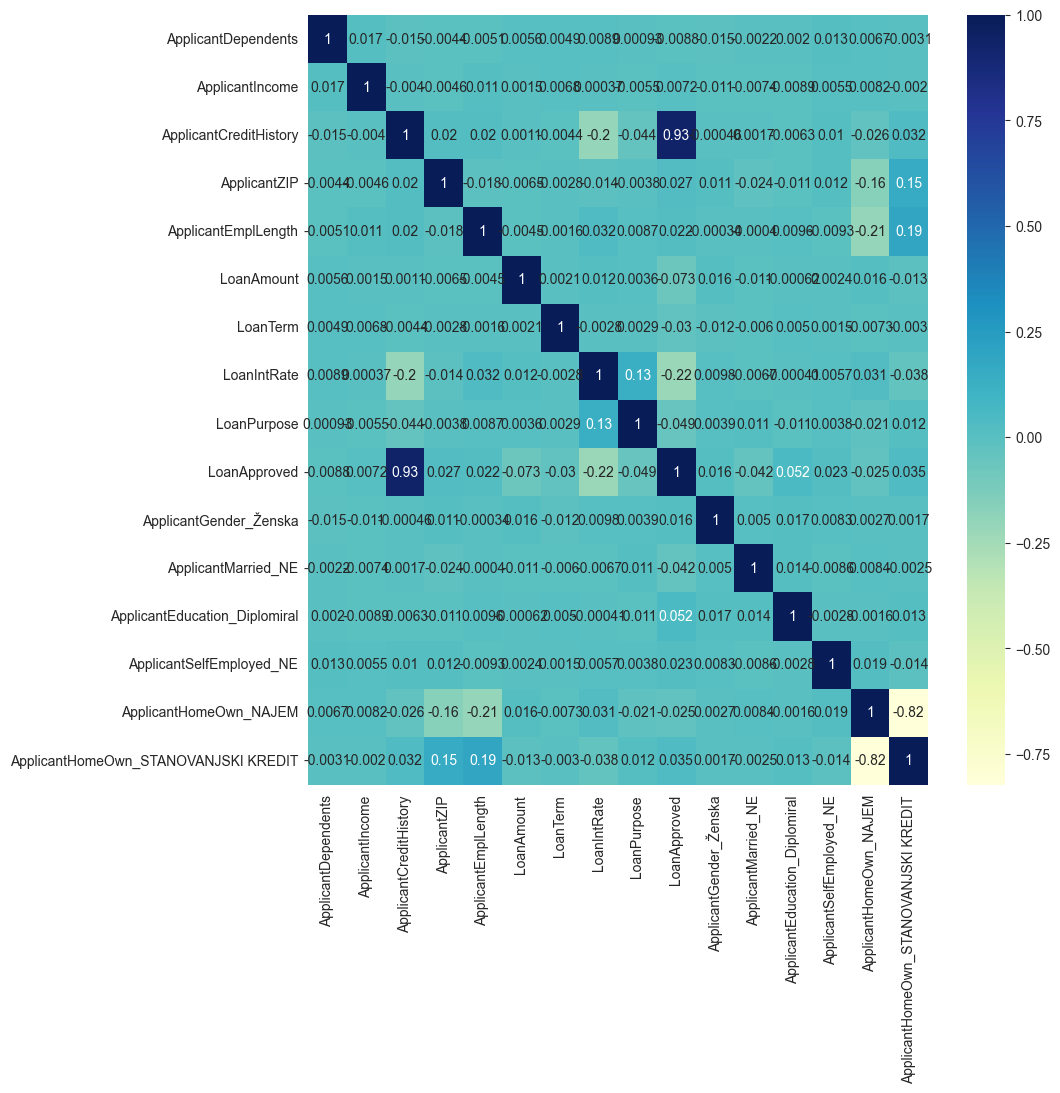

In [54]:
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [55]:
X = df.drop('LoanApproved',axis=1)
y = df['LoanApproved']
print(X, y)

       ApplicantDependents  ApplicantIncome  ApplicantCreditHistory  \
22726                  0.0      1033.333333                     0.0   
429                    3.0      2011.000000                     1.0   
25021                  2.0      6055.000000                     1.0   
31218                  0.0       716.333333                     1.0   
12257                  2.0       826.333333                     1.0   
...                    ...              ...                     ...   
3562                   1.0      2000.000000                     1.0   
29399                  0.0      2555.666667                     1.0   
6198                   0.0      2274.000000                     1.0   
4999                   2.0      1856.000000                     1.0   
15192                  0.0      1119.000000                     1.0   

       ApplicantZIP  ApplicantEmplLength  LoanAmount  LoanTerm  LoanIntRate  \
22726            10                  6.0     17500.0      45.0      

In [56]:
PCAPipeline = make_pipeline(StandardScaler(), PCA(n_components=2,random_state=0))

In [57]:
categorical_columns = X.select_dtypes(include=['category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
print(X_encoded.head())


       ApplicantDependents  ApplicantIncome  ApplicantCreditHistory  \
22726                  0.0      1033.333333                     0.0   
429                    3.0      2011.000000                     1.0   
25021                  2.0      6055.000000                     1.0   
31218                  0.0       716.333333                     1.0   
12257                  2.0       826.333333                     1.0   

       ApplicantZIP  ApplicantEmplLength  LoanAmount  LoanTerm  LoanIntRate  \
22726            10                  6.0     17500.0      45.0         3.12   
429              11                  8.0     19600.0      90.0         1.30   
25021            14                  7.0     35000.0      90.0         1.21   
31218            30                 10.0     39200.0      90.0         1.52   
12257            44                  9.0     50050.0      90.0         3.80   

       LoanPurpose  ApplicantGender_Ženska  ApplicantMarried_NE  \
22726            0             

In [58]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X_encoded))
PCA_df = pd.concat([PCA_df, y], axis=1)
PCA_df.head()

,0,1,LoanApproved
0,1.868989,-0.669885,1.0
1,1.507459,-0.045288,NaN
2,-1.078944,3.368611,NaN
3,-1.610697,-0.623614,NaN
4,-1.413742,-0.470449,1.0


//